# Notion

This notebook is the modified notebook of [AtomisticSimulationTutorial](https://docs.matlantis.com/atomistic-simulation-tutorial/en/) to run on Google Colab. We only provide executable parts with general library.

# ASE Structure

## Structure Generation Methods

We directly specified the coordinates of atoms in the previous section.
It is good if you want to set the position of each atom in detail, however, explicitly checking and setting the coordinate values of each atom is usually difficult.

In ASE, various easy structure generation methods are defined.

- https://wiki.fysik.dtu.dk/ase/ase/build/build.html

## Initial setup

In [1]:
!pip install ase

Looking in indexes: https://pypi.org/simple, http://pypi.artifact.svc:8080/simple

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import os

from IPython.display import HTML, Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation

from ase import Atoms
from ase.build import make_supercell
from ase.io import write
from ase.visualize import view

os.makedirs("output", exist_ok=True)

def view_x3d(atoms, idx=0):
    if isinstance(atoms[0], Atoms):
        # Assume this is a trajectory or struct list
        if (len(atoms) <= idx):
                print(f"The specified index exceeds the length of the trajectory. The length of the trajectory is {len(atoms)}.")
        return view(atoms[idx], viewer="x3d")
    else:
        return view(atoms, viewer="x3d")


def view_ase_atoms(atoms, rotation="0x,0y,0z", figsize=(4, 4), title="", scale=100):
    fig, ax = plt.subplots(figsize=figsize)
    write("output/tmp.png", atoms, rotation=rotation, scale=scale)
    img = mpimg.imread('output/tmp.png')
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')
    plt.show()
    os.remove('output/tmp.png')
    return

def traj_to_apng(traj, rotation='30x,30y,30z'):
    imgs = []
    for atom in traj:
        supercell = make_supercell(atom, [[1, 0, 0], [0, 1, 0], [0, 0, 1]])
        write('output/tmp.png', supercell, rotation=rotation, show_unit_cell=2)
        img = mpimg.imread('output/tmp.png')
        imgs.append(img)
    os.remove('output/tmp.png')

    fig, ax = plt.subplots()

    def update(frame):
        img = imgs[frame]
        ax.clear()
        ax.imshow(img)
        return []

    ani = FuncAnimation(fig, update, frames=len(imgs), blit=True)
    plt.close()
    return HTML(ani.to_jshtml())

### ASE molecule

The `molecule` method can create organic molecules registered with ASE. <br/>
The list of registered names can be seen below.

In [3]:
from ase.build import molecule
from ase.collections import g2

print(f"Available molecule:", len(g2.names), g2.names)

Available molecule: 162 ['PH3', 'P2', 'CH3CHO', 'H2COH', 'CS', 'OCHCHO', 'C3H9C', 'CH3COF', 'CH3CH2OCH3', 'HCOOH', 'HCCl3', 'HOCl', 'H2', 'SH2', 'C2H2', 'C4H4NH', 'CH3SCH3', 'SiH2_s3B1d', 'CH3SH', 'CH3CO', 'CO', 'ClF3', 'SiH4', 'C2H6CHOH', 'CH2NHCH2', 'isobutene', 'HCO', 'bicyclobutane', 'LiF', 'Si', 'C2H6', 'CN', 'ClNO', 'S', 'SiF4', 'H3CNH2', 'methylenecyclopropane', 'CH3CH2OH', 'F', 'NaCl', 'CH3Cl', 'CH3SiH3', 'AlF3', 'C2H3', 'ClF', 'PF3', 'PH2', 'CH3CN', 'cyclobutene', 'CH3ONO', 'SiH3', 'C3H6_D3h', 'CO2', 'NO', 'trans-butane', 'H2CCHCl', 'LiH', 'NH2', 'CH', 'CH2OCH2', 'C6H6', 'CH3CONH2', 'cyclobutane', 'H2CCHCN', 'butadiene', 'C', 'H2CO', 'CH3COOH', 'HCF3', 'CH3S', 'CS2', 'SiH2_s1A1d', 'C4H4S', 'N2H4', 'OH', 'CH3OCH3', 'C5H5N', 'H2O', 'HCl', 'CH2_s1A1d', 'CH3CH2SH', 'CH3NO2', 'Cl', 'Be', 'BCl3', 'C4H4O', 'Al', 'CH3O', 'CH3OH', 'C3H7Cl', 'isobutane', 'Na', 'CCl4', 'CH3CH2O', 'H2CCHF', 'C3H7', 'CH3', 'O3', 'P', 'C2H4', 'NCCN', 'S2', 'AlCl3', 'SiCl4', 'SiO', 'C3H4_D2d', 'H', 'COF2', '

Atoms can be created by simply specifying a string as follows.

In [4]:
ch3cho_atoms = molecule("CH3CHO")
view_x3d(ch3cho_atoms)

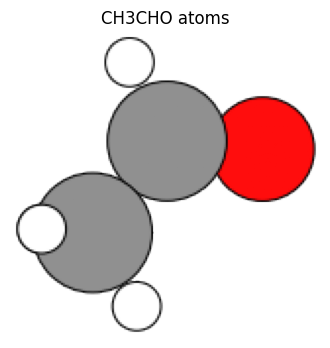

In [5]:
view_ase_atoms(ch3cho_atoms, rotation="0x,0y,0z", figsize=(4, 4), title="CH3CHO atoms", scale=40)

### ASE bulk

The `bulk` method can be used to create crystal structures easily.
The crystal structure is generated by specifying the values that characterize the crystal, as shown below.

 - `name`: Atom symbol name
 - `crystalstructure`: The crystal structure, such as "sc", "fcc", "bcc", etc.
 - `a, b, c, alpha, covera`: Specify the shape and size of the cnell.
 - `cubic`: Whether the cell should be a cubic unit cell or not.

In [6]:
from ase.build import bulk

fe_sc_atoms = bulk(name="Fe", crystalstructure="sc", a=2.0)
fe_sc_atoms

Atoms(symbols='Fe', pbc=True, cell=[2.0, 2.0, 2.0])

In the following visualization, only one atom is shown with border, which is the **cell**.

In [7]:
view_x3d(fe_sc_atoms)

Given a cell and a periodic boundary condition (pbc), consider a structure such that the above structure continues indefinitely according to the periodic boundary condition. <br/>
In other words, although only one atom is shown on the display, it represents a crystal structure in which the structures are arranged in a regular sequence, as in the following structure.

In [8]:
view_x3d(fe_sc_atoms * (6, 6, 6))

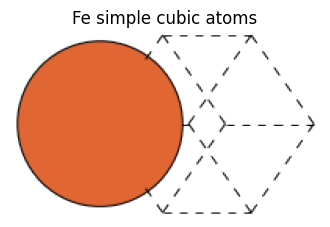

In [9]:
view_ase_atoms(fe_sc_atoms, rotation="45x,45y,0z", figsize=(4, 4), title="Fe simple cubic atoms", scale=40)

If you do not specify `crystalstructure`, cell size `a`, etc., ASE will [automatically determine the best value based on the elemental species](https://gitlab.com/ase/ase/-/blob/6cb8784ac1056b7b897822ff7b763a323d92a543/ase/data/__init__.py#L578)。

For example, the Fe BCC structure is `a=2.87`.

In [10]:
fe_atoms = bulk("Fe")
fe_atoms

Atoms(symbols='Fe', pbc=True, cell=[[-1.435, 1.435, 1.435], [1.435, -1.435, 1.435], [1.435, 1.435, -1.435]], initial_magmoms=...)

In [11]:
view_x3d(fe_atoms)

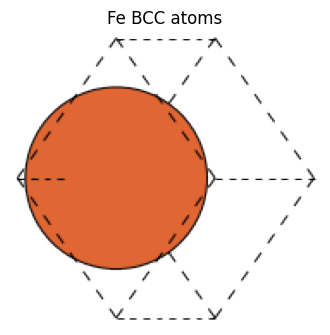

In [12]:
view_ase_atoms(fe_atoms, rotation="45x,0y,0z", figsize=(4, 4), title="Fe BCC atoms", scale=40)

As shown above, in the BCC and FCC structures, the primitive cell, which is a unit cell containing only one atom, is not cubic, but it can be made cubic by taking an extended unit cell. 
Atoms with a cubic lattice can be generated by setting the `cubic=True` argument.
The difference between these primitive cells and unit cells with cubic cells can be found in the following references.

 - https://www2.latech.edu/~pderosa/SS_2010/Supporting%20Documents/4p70chap1lect2b.pdf

In [13]:
fe_cubic_atoms = bulk("Fe", cubic=True)
fe_cubic_atoms

Atoms(symbols='Fe2', pbc=True, cell=[2.87, 2.87, 2.87], initial_magmoms=...)

In [14]:
view_x3d(fe_cubic_atoms)

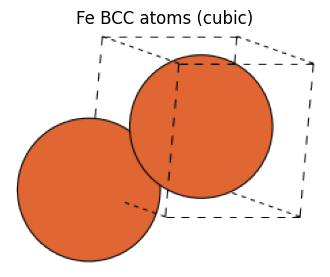

In [15]:
view_ase_atoms(fe_cubic_atoms, rotation="10x,30y,0z", figsize=(4, 4), title="Fe BCC atoms (cubic)", scale=40)

**repeat method**

A structure with periodic boundary conditions can be made into a super cell by using the `repeat` method to repeat the unit cell structure.

In the following example, the atomic structure of a cell is created with the size of 2x in the a-axis direction, 3x in the b-axis direction, and 4x in the c-axis direction.

In [16]:
fe234_atoms = fe_atoms.repeat((2, 3, 4))
view_x3d(fe234_atoms)

Instead of the `repeat` method, it can be specified by multiplication.

In [17]:
fe234_atoms = fe_atoms * (2, 3, 4)
view_x3d(fe234_atoms)

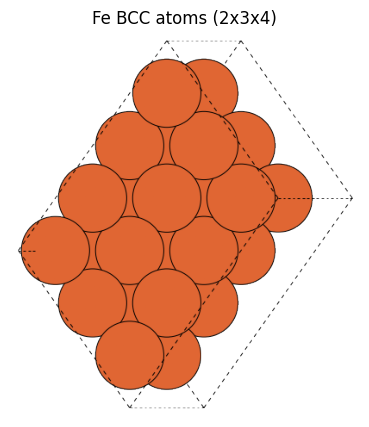

In [18]:
view_ase_atoms(fe234_atoms, rotation="45x,0y,0z", figsize=(5, 5), title="Fe BCC atoms (2x3x4)", scale=30)

Considering that the unit cell continues infinitely according to the periodic boundary condition, we can confirm that the Fe structure represented by the primitive cell without specifying cubic and the Fe structure of the unit cell with `cubic=True`  represent the same structure.

The `bulk` method can also create structures consisting of two elements.

In [19]:
nacl_atoms = bulk("NaCl", crystalstructure="rocksalt", a=2.0)
view_x3d(nacl_atoms * (3, 3, 3))

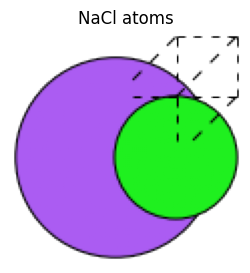

In [20]:
view_ase_atoms(nacl_atoms, rotation="0x,0y,0z", figsize=(3, 3), title="NaCl atoms", scale=30)

### Slab: Surface structure

When we deal with reactions with catalysts, we model the phenomena by looking at how reactants behave with respect to the surface of a metal crystal. <br/>
The surface of the crystal can be specified by [Miller index](https://en.wikipedia.org/wiki/Miller_index).

ASE can produce a cutout of each surface with a specified Miller index for major crystal structures. 
Surfaces are created in the z-axis direction. <br/>
A structure with such a surface is called a slab structure.
When creating a slab structure, the following parameters are specified.

- `symbol`: The atom element type.
- `size`: Number of atoms in each direction of x, y, and z axes.
- `vacuum`: The thickness of the vacuum layer to be created above and below the z-axis.

In [21]:
from ase.build import (
    fcc100, fcc110, fcc111, fcc211, fcc111_root,
    bcc100, bcc110, bcc111, bcc111_root,
    hcp0001, hcp10m10, hcp0001_root,
    diamond100, diamond111
)

# fcc: fcc100(), fcc110(), fcc111(), fcc211(), fcc111_root()
# bcc: bcc100(), bcc110(), bcc111() * - bcc111_root()
# hcp: hcp0001(), hcp10m10(), hcp0001_root()
# diamond: diamond100(), diamond111()

pt100_atoms = fcc100("Pt", size=(4, 5, 6), vacuum=10.0)

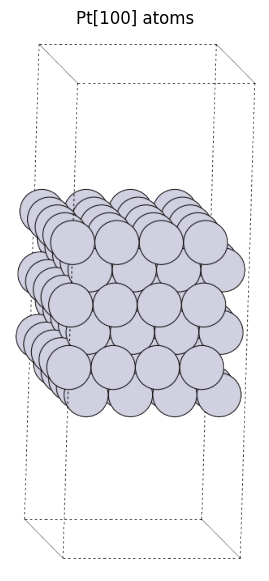

In [22]:
view_ase_atoms(pt100_atoms, rotation="-80x,10y,0z", figsize=(7.0, 7.0), title="Pt[100] atoms", scale=20)

In [23]:
fcc100?

Signature: fcc100(symbol, size, a=None, vacuum=None, orthogonal=True, periodic=False)
Docstring:
FCC(100) surface.

Supported special adsorption sites: 'ontop', 'bridge', 'hollow'.
File:      ~/.py39/lib/python3.9/site-packages/ase/build/surface.py
Type:      function


We usually focus on one side of the surface in the analysis, but even in that case, there will be another surface on the opposite side. 
The analysis is performed with some thickness (6 layers in this example) to avoid the influence of the opposite surface.

### Structure generation from SMILES

When dealing with organic molecules, the [SMILES notation](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) is often used to represent a particular molecule. <br/>
For example, ethylene can be represented by "C=C".
The following function uses [pubchem](https://pubchem.ncbi.nlm.nih.gov/), a database handles organic molecules, to generate Atoms from SMILES.

In [24]:
from ase.data.pubchem import pubchem_atoms_search

atoms = pubchem_atoms_search(smiles="C=C")
view_x3d(atoms)

### Read from file

ASE supports writing and reading from files describing various atomic structures, such as xyz, cif, VASP POSCAR files, etc. <br/>
See the following document for a list of supported files.

 - https://wiki.fysik.dtu.dk/ase/ase/io/io.html

In [25]:
from ase.io import read, write

# write to file
write("output/pt100.xyz", pt100_atoms)

/home/jovyan/.py39/lib/python3.9/site-packages/ase/io/extxyz.py:311: UserWarning: Skipping unhashable information adsorbate_info
  warnings.warn('Skipping unhashable information '


In [26]:
# read from file
read("output/pt100.xyz")

Atoms(symbols='Pt120', pbc=[True, True, False], cell=[11.087434329005065, 13.85929291125633, 29.8], tags=...)

### Use an external database

It is also possible to download files and read in structures from large databases such as

 - Materials Project:
   - https://materialsproject.org/
   - https://next-gen.materialsproject.org/
 - PubChem: https://pubchem.ncbi.nlm.nih.gov/

Please refer to the examples in the Matlantis product for information on how to use these files.